In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import Constants.SI as SI
from Field_Ionization import eBeam_v02 as eBeam2
import matplotlib.patches as patches
c = SI.lightSpeed;

In [2]:
#x = np.random.rand(100,100)
#fig, ax = plt.subplots()
#ax.add_artist(pat.Ellipse((0,0), 5, 5, fc = 'none', ls = '--', ec = 'k'))
#img = ax.imshow(x, aspect = 'auto', extent = [-10, 10, -10, 10])
#ax.set_xlim([-10, 10])
#ax.set_ylim([-10,10])
#plt.show()

In [3]:
# Beam parameters (Facet II)
gamma = 20000; 
beta = np.sqrt(1 - 1/gamma**2); 
en = 5.3e-6; 
beta_s = np.linspace(.05, 1.5, 100);
sigma_z = 5e-6; 
sigma_t = sigma_z / (beta * c); 
Q = 1.5e-9;

beamParams = {
              'gamma'   : gamma,  
              'sigma_z' : sigma_z, 
              'sigma_t' : sigma_t, 
              'beta'    : beta,
              'charge'  : Q, 
              'emitt'   : en, 
              'beta_s'  : beta_s
             }

eBeam2.get_sigma_r(beamParams)
pPk = eBeam2.peak_charge_dens(beamParams)
r, xi, npoints = eBeam2.get_pos(beamParams, nxi = 5, npoints = 1000);
pos = {'r' : r, 'xi' : xi, 'npoints' : npoints}


In [4]:
field, rPeak, EPeak = eBeam2.rad_E_field(pos, beamParams)

In [5]:
ind = 0;
r = np.flipud(pos['r'][ind])*1e6
t = (pos['xi'] * 1e15 / (beamParams['beta']*c)) -\
(pos['xi'][0]*1e15 /(beamParams['beta']*c));
ext = [min(t), max(t), min(r), max(r)]
lw = 1

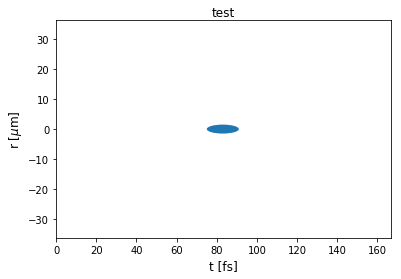

In [19]:
cbar_label = 'Er'; fs = 12; title = 'test'
fig1 = plt.figure(); ax1 = fig1.gca()
cen = (int(t[-1]/2), 0)
ax1.add_artist(patches.Ellipse(cen, 16, 3))
#img1 = ax1.imshow(np.flipud(field[ind]), cmap = 'jet',aspect = 'auto', \
#extent = ext)
#cbar1 = plt.colorbar(mappable = img1, ax = ax1)
#cbar1.set_label(cbar_label, fontsize = fs)
#cbar1.ax.tick_params(labelsize = fs - 2)
# draw ellipse of beam


ax1.set_xlabel('t [fs]', fontsize = fs);
ax1.set_ylabel('r [$\mu$m]', fontsize = fs);
ax1.set_title(title, fontsize = fs)
ax1.set_xlim(ext[0:2])
ax1.set_ylim(ext[2:4])
ax1.tick_params(axis = 'both', labelsize = fs - 2)
plt.show()


In [9]:
beamParams['sigma_t']*1e15

16.678204780755358

In [10]:
beamParams['sigma_r'][ind]*1e6

3.640054944640259

In [22]:
t[-1]/2 

83.391023903776784

In [25]:
sigma_t * 1e15 + 83

99.678204780755351